# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


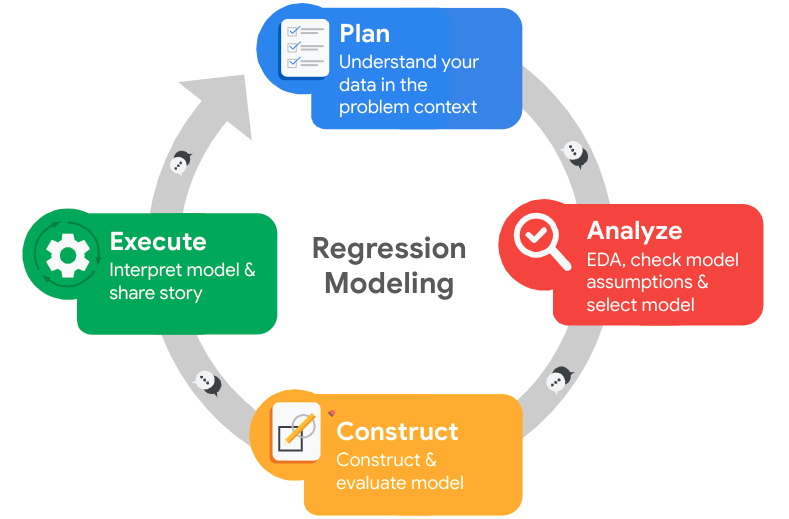

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 

# Import packages for data manipulation
### YOUR CODE HERE ###
import numpy as np
import pandas as pd

# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
import seaborn as sns

# Import packages for data preprocessing
### YOUR CODE HERE ###
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.utils import resample


# Import packages for data modeling
### YOUR CODE HERE ###
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import packages for model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, \
ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.metrics import classification_report

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


there seems not to be any null values in our table. That is good

### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary']

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
df0.head(5)

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  Work_accident  left  promotion_last_5years Department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [10]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()]

satisfaction_level  last_evaluation  number_project  \
396                  0.46             0.57               2   
866                  0.41             0.46               2   
1317                 0.37             0.51               2   
1368                 0.41             0.52               2   
1461                 0.42             0.53               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_monthly_hours  tenure  Work_accident  left  \
396                      139       3              0     1   
866                      128       3              0     1   
1317                     127       3              0     1   
1368                     132       3              0     1   
1461                     142       3              0     1   
...                      ...     ...            ...   ...   
14994                    151       3              0     1   
14995                    160       3              0     1   
14996                    143       3              0     1   
14997                    280       4              0     1   
14998                    158       3              0     1   

       promotion_last_5years  Department  salary  
396                        0       sales     low  
866                        0  accounting     low  
1317                       0       sales  medium  
1368                       0       RandD     low  
1461                       0       sales     low  
...                      ...         ...     ...  
14994                      0     support     low  
14995                      0     support     low  
14996                      0     support     low  
14997                      0     support     low  
14998                      0     support     low  

[3008 rows x 10 columns]

In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###

data_deduplicate = df0.drop_duplicates()
# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
data_deduplicate.head(-10)

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11985                0.72             0.64               4   
11986                0.48             0.50               5   
11987                0.19             0.79               4   
11988                0.49             0.49               3   
11989                0.90             0.76               3   

       average_monthly_hours  tenure  Work_accident  left  \
0                        157       3              0     1   
1                        262       6              0     1   
2                        272       4              0     1   
3                        223       5              0     1   
4                        159       3              0     1   
...                      ...     ...            ...   ...   
11985                    192       3              0     0   
11986                    142       4              0     0   
11987                    229       4              0     0   
11988                    104       7              0     0   
11989                    255       7              0     0   

       promotion_last_5years   Department  salary  
0                          0        sales     low  
1                          0        sales  medium  
2                          0        sales  medium  
3                          0        sales     low  
4                          0        sales     low  
...                      ...          ...     ...  
11985                      0        sales  medium  
11986                      0           IT  medium  
11987                      0  product_mng  medium  
11988                      0  product_mng    high  
11989                      0  product_mng     low  

[11981 rows x 10 columns]

In [12]:
#data_deduplicate.drop(labels = 'index', axis=1, inplace=True)

### 3.0 Analyzing Our Data Set - EDA

### Check outliers

Check for outliers in the data.

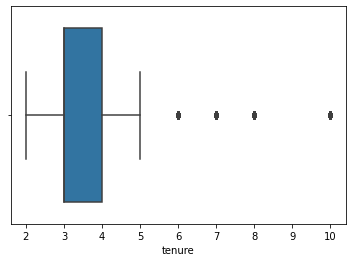

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

sns.boxplot(data_deduplicate['tenure'])

In [14]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

len(data_deduplicate[data_deduplicate['tenure'] > 5])

824

In [15]:
def Outliers(dataframe, column_name):
    '''
    This is a function that takes in a dataframe and column name to determine the upper and lower limts of the feature 
    and the number of outliers in a dataframe. 
    it does this by calculating the 75th & 25th percentiles as the upper & lower limits, and
    using both values to derive the interquartile range and slicing the dataframe.
    
    '''
    
    df = dataframe
    column = str(column_name)
    
    #calculating the 25th & 75th percentiles
    percentile25 = df[column].quantile(0.25)
    percentile75 = df[column].quantile(0.75)
    
    #calculating the interquartile range
    iqr = percentile75 - percentile25
    
    upper_limit = percentile75 + 1.5*iqr
    lower_limit = percentile25 - 1.5*iqr
    
    outliers = df[(df[column] > upper_limit) | (df[column] < lower_limit)]
    
    return len(outliers), upper_limit, lower_limit
    

In [16]:
#tenure outliers
No_of_outliers, upper_limit, lower_limit = Outliers(data_deduplicate, 'tenure')

print(f"No of outliers: {No_of_outliers}")
print(f'upper limit: {upper_limit}')
print(f'lower limit: {lower_limit}')

No of outliers: 824
upper limit: 5.5
lower limit: 1.5


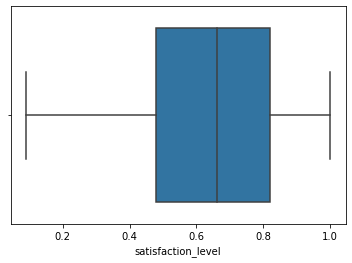

In [17]:
#plotting the satisfaction level to check for outliers
sns.boxplot(data_deduplicate['satisfaction_level'])

In [18]:
#printing outliers upper and lower limit for the satisfaction level
No_of_outliers, upper_limit, lower_limit = Outliers(data_deduplicate, 'satisfaction_level')

print(f"No of outliers: {No_of_outliers}")
print(f'upper limit: {upper_limit}')
print(f'lower limit: {lower_limit}')

No of outliers: 0
upper limit: 1.33
lower limit: -0.030000000000000027


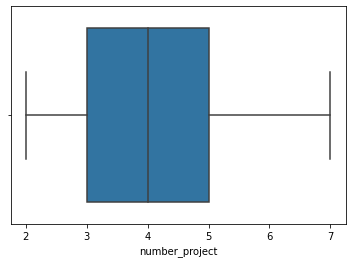

In [19]:
#plotting a boxplot showing the distribution of number of projects
sns.boxplot(data_deduplicate['number_project'])

In [20]:
#showing the upper and lower limits of the number of projects and the no of outliers
No_of_outliers, upper_limit, lower_limit = Outliers(data_deduplicate, 'number_project')

print(f"No of outliers: {No_of_outliers}")
print(f'upper limit: {upper_limit}')
print(f'lower limit: {lower_limit}')

No of outliers: 0
upper limit: 8.0
lower limit: 0.0


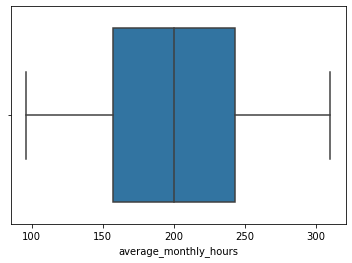

In [21]:
#plotting a box plot showing the distribution of average monthly hours

sns.boxplot(data_deduplicate['average_monthly_hours'])

In [22]:
#printing the upper and lower limits and showing the number of outliers
No_of_outliers, upper_limit, lower_limit = Outliers(data_deduplicate, 'average_monthly_hours')

print(f"No of outliers: {No_of_outliers}")
print(f'upper limit: {upper_limit}')
print(f'lower limit: {lower_limit}')

No of outliers: 0
upper limit: 372.0
lower limit: 28.0


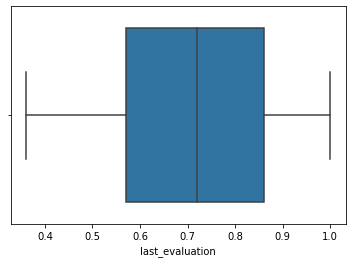

In [23]:
#plotting a boxplot to understand the distribution of "last evaluation"
sns.boxplot(data_deduplicate['last_evaluation'])

In [24]:
#printing the upper and lower limit and counting the number of outliers
No_of_outliers, upper_limit, lower_limit = Outliers(data_deduplicate, 'average_monthly_hours')

print(f"No of outliers: {No_of_outliers}")
print(f'upper limit: {upper_limit}')
print(f'lower limit: {lower_limit}')

No of outliers: 0
upper limit: 372.0
lower limit: 28.0


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

Only tenure had a few outliers, we will consider removing them when developing our model

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [25]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(data_deduplicate["left"].value_counts())
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(data_deduplicate["left"].value_counts(normalize=True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

We will start by understanding each feature and their relationship with the "left" feature.

In [26]:
df1=data_deduplicate.copy()

#### Analyzing the Continuous variables 

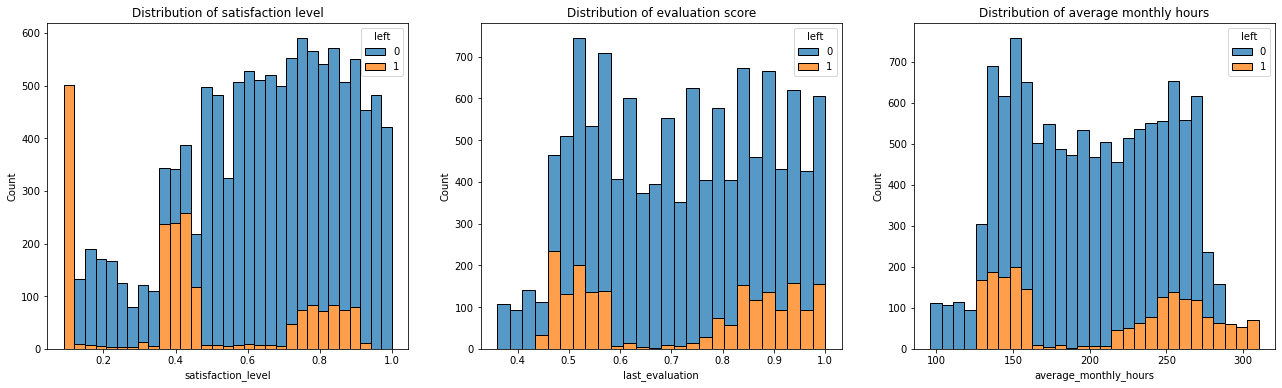

In [27]:
#set figure and axes
#plotting frequency of satisfaction level, evaluation score & monthly hours and showing the relationship with retention
fig, ax = plt.subplots(1,3, figsize = (22,6))

sns.histplot(data = df1, x= 'satisfaction_level', hue='left', ax=ax[0], multiple='stack')
ax[0].set_title('Distribution of satisfaction level', fontsize=12)

sns.histplot(data = df1, x= 'last_evaluation', hue='left', multiple = 'stack', ax=ax[1])
ax[1].set_title('Distribution of evaluation score', fontsize=12)

sns.histplot(data = df1, x= 'average_monthly_hours', hue='left', multiple = 'stack', ax=ax[2])
ax[2].set_title('Distribution of average monthly hours', fontsize=12)

plt.show();

1. We can observe that employees with extremely low satisfaction level have a very high rate of attrition. Also, employees that work very long hours in a month (between 250 to 300) have a higher probability of leaving. 

2. It is also evident that employees with very low hours ~120 to ~155 leave. This might be employees that have been layed off, as the dataset doesn't distinguish between employees that resign that those that are let go. 

3. A similar observation can be made with employee evaluation; high performing employees have a relatively higher chance of leaving when compared to average performing employees. Also, employees that perform poorly also have a tendency to leave, probably because they were let go.

For further analysis, we will explore the relationship between these 3 continous variables and the discrete numeric features: 
1. tenure
2. number of projects

We will also look at their interrelationships

#### Analyzing the relationships between the Continuous variables

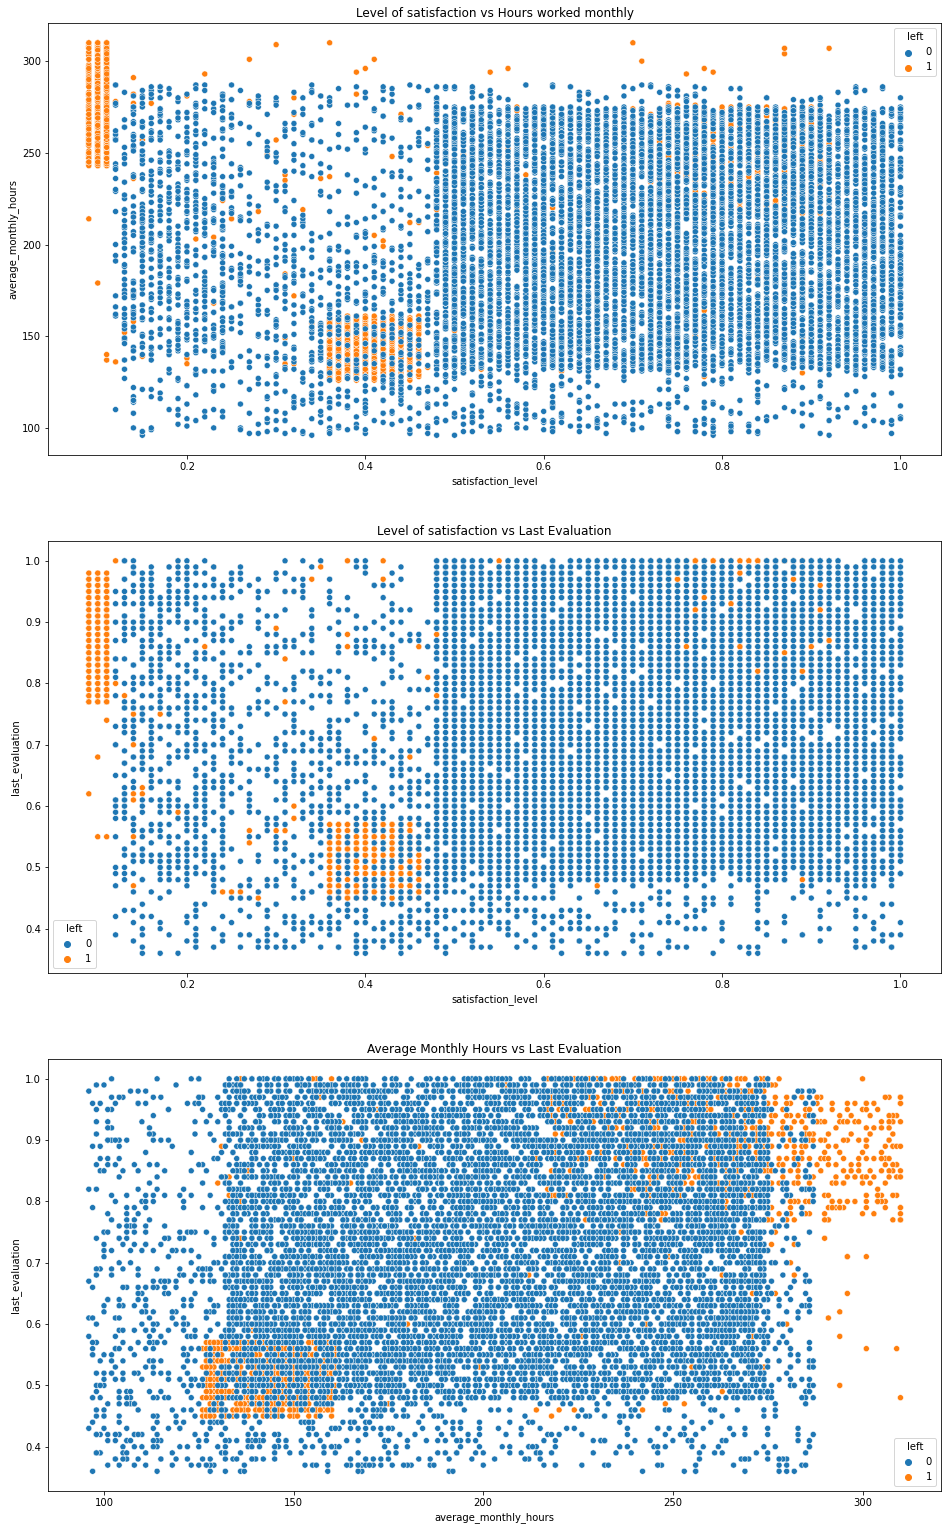

In [28]:
fig, ax = plt.subplots(3, 1, figsize=(16,27))
sns.scatterplot(data = df1, x='satisfaction_level', y='average_monthly_hours', hue='left', ax=ax[0])
ax[0].set_title('Level of satisfaction vs Hours worked monthly', fontsize='12')

sns.scatterplot(data = df1, x='satisfaction_level', y='last_evaluation', hue='left', ax=ax[1])
ax[1].set_title('Level of satisfaction vs Last Evaluation', fontsize='12')

sns.scatterplot(data = df1, x='average_monthly_hours', y='last_evaluation', hue='left', ax=ax[2])
ax[2].set_title('Average Monthly Hours vs Last Evaluation', fontsize='12')

plt.show()

From these charts we observe a cluster of employees that churn with the following attributes:
1. They are high performers (~0.75 to 1.0 evaluation score)
2. They work significantly more hours than the average employee ( ~275 to 310+) - above the 75th percentile.
3. They have very low satisfaction scores - less than 0.2

These employees are probably unhappy because of their pay grade or lack of promotion despite their effort and performance. 

For further analysis we will check if they have been promoted in the last 5 years, and what salary scale they fall under

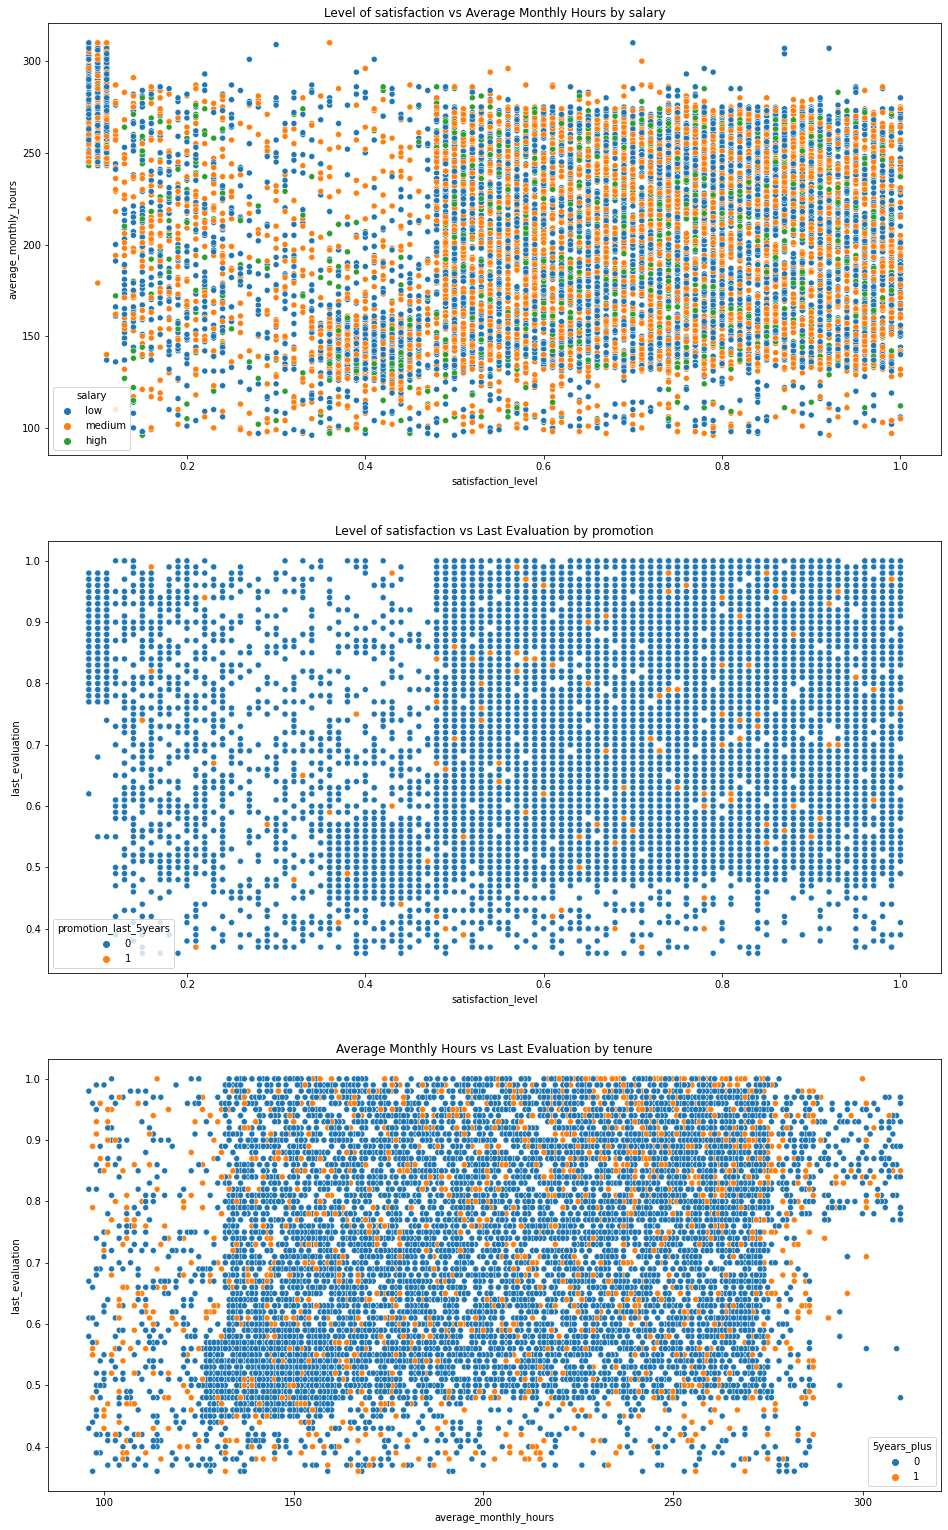

In [29]:
fig, ax = plt.subplots(3, 1, figsize=(16,27))
sns.scatterplot(data = df1, x='satisfaction_level', y='average_monthly_hours', hue='salary', ax=ax[0])
ax[0].set_title('Level of satisfaction vs Average Monthly Hours by salary', fontsize='12')

sns.scatterplot(data = df1, x='satisfaction_level', y='last_evaluation', hue='promotion_last_5years', ax=ax[1])
ax[1].set_title('Level of satisfaction vs Last Evaluation by promotion', fontsize='12')

df1_copy = df1.copy()
df1_copy['5years_plus'] = [1 if x >= 5 else 0 for x in df1_copy['tenure']]
sns.scatterplot(data = df1_copy, x='average_monthly_hours', y='last_evaluation', hue='5years_plus', ax=ax[2])
ax[2].set_title('Average Monthly Hours vs Last Evaluation by tenure', fontsize='12')


plt.show()

1. From the charts above we can see that these employees have not been promoted in the last 5 years despite their high performance and the time they have put into their job, even when they have been at the company for over 5 years.
2. We also observe that the other cluster of employees that have left have not been promoted in the last 5 years as well.


In further analysis, we can look into how their salary compares to other staff in the same position, but from the chart above, they mostly earn middle to low salaries.


#### Evaluating relationship between discrete variables

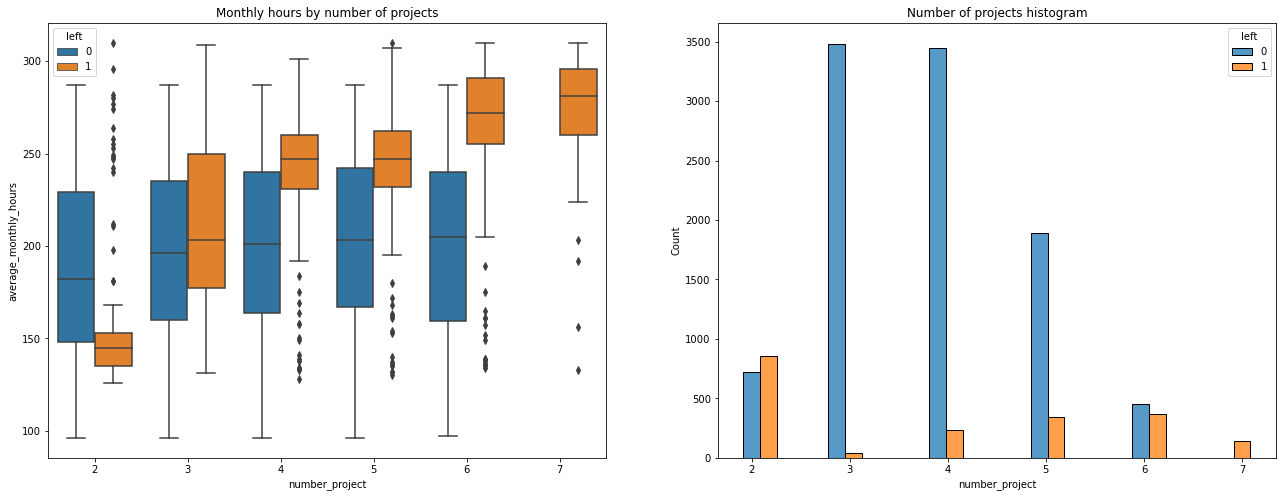

In [30]:
#set figure & axes
fig, ax = plt.subplots(1,2, figsize=(22, 8))

#creating a boxplot of average monthly hours vs number of projects & comparing employees who stay vs those that leave
sns.boxplot(data=df1, y='average_monthly_hours', x='number_project', hue='left', ax=ax[0])
ax[0].set_title('Monthly hours by number of projects', fontsize='12')

#creating a histogram that shows distribution of the 'number of projects', & comparing employees who stayed vs those that left
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='12')

plt.show()


Our observations from this plot:
    
1. Employees that are assigned more projects work more hours on average. This seems logical
2. Employees that are assigned to 7 projects all leave.
3. There also seems to be a high churn rate amomgst employees on 2 projects, probably because the company had planned to lay them off.
4. Most employees work 3 to 5 projects

Already we know that employees in this company are overworked because the average monthly work hours is ~201 a month which is almost 40 hours more than an employee working a 9 to 5 will normally work in a month.

In [31]:
data_left = data_deduplicate[data_deduplicate['left'] == 1]
data_left.head()

data_left['tenure'].value_counts(normalize=True)

3    0.438975
4    0.248619
5    0.242089
6    0.054746
2    0.015570
Name: tenure, dtype: float64

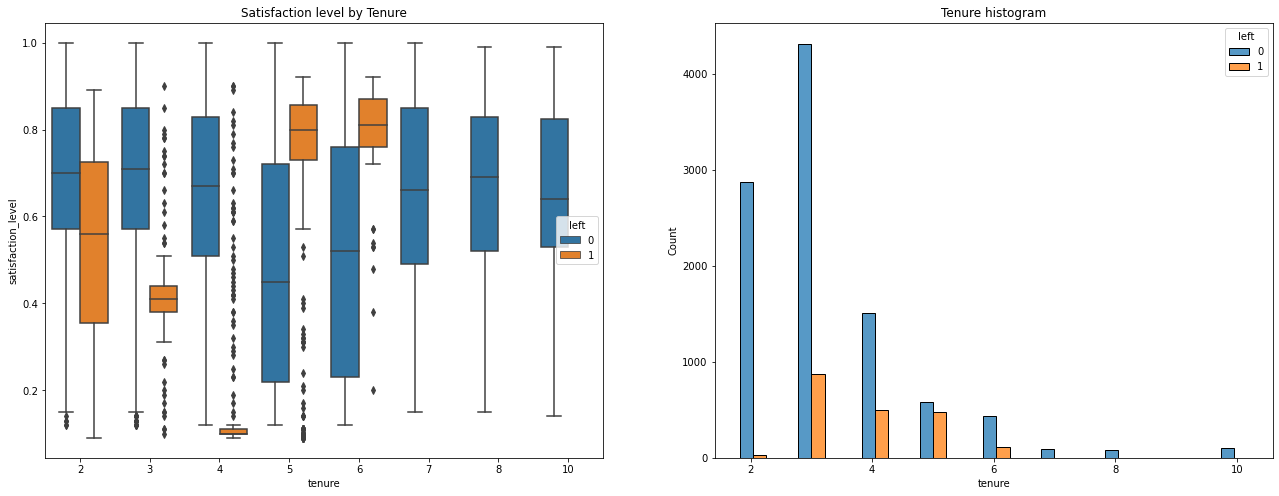

In [32]:
fig, ax = plt.subplots(1,2, figsize=(22, 8))

#creating a boxplot of average monthly hours vs number of projects & comparing employees who stay vs those that leave
sns.boxplot(data=df1, y='satisfaction_level', x='tenure', hue='left', ax=ax[0])
ax[0].set_title('Satisfaction level by Tenure', fontsize='12')

#creating a histogram that shows distribution of the 'number of projects', & comparing employees who stayed vs those that left
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='12')

plt.show()

4th year employees that left, tend to have very low satisfaction levels.

5th and 6th year employees that left, tend to hae higher satisfaction level - maybe they got better job offers.

Employees that have been in the company for 7 years or more didn't leave.

93% of all the employees that leave are in their 3rd, 4th or 5th year

In [33]:
# Create a plot as needed
### YOUR CODE HERE ###
satisfaction_by_retention = data_deduplicate.groupby('left')['satisfaction_level'].agg('mean')
satisfaction_by_retention

left
0    0.667365
1    0.440271
Name: satisfaction_level, dtype: float64

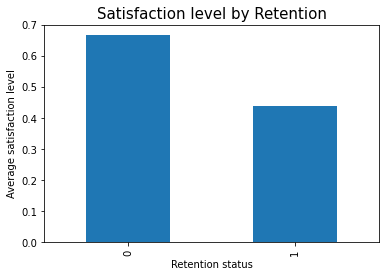

In [34]:
sat_level = satisfaction_by_retention.plot(kind='bar')
sat_level.set_ylabel('Average satisfaction level')
sat_level.set_xlabel('Retention status')
sat_level.set_title('Satisfaction level by Retention', fontsize=15)
plt.show()

Employees that stay tend to have a higher satisfaction level 

In [35]:
# Create a plot as needed
### YOUR CODE HERE ###
dept_exit = data_left['Department'].value_counts(normalize=True)
dept_exit

sales          0.276243
technical      0.195881
support        0.156705
IT             0.079357
hr             0.056755
marketing      0.056253
product_mng    0.055249
accounting     0.054746
RandD          0.042692
management     0.026118
Name: Department, dtype: float64

Text(0.5, 1.0, 'Retention by department')

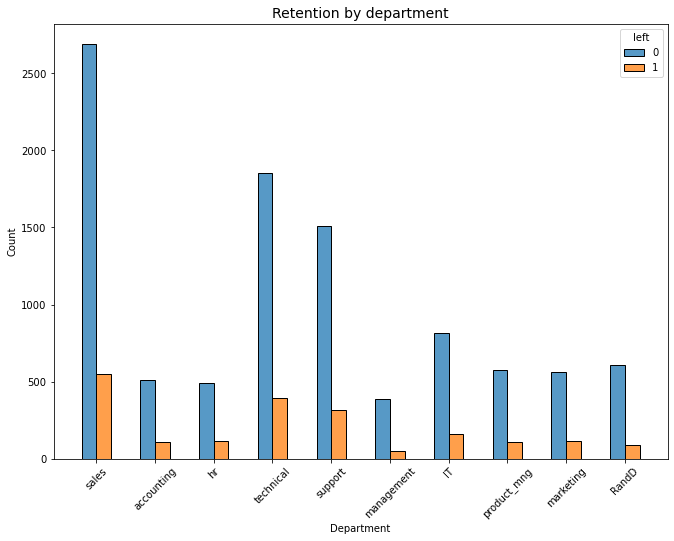

In [36]:
#creating a histogram that compares employees that left by department

plt.figure(figsize=(11,8))
sns.histplot(data=df1, x='Department', hue='left', discrete=1, hue_order=[0, 1], multiple='dodge', shrink=.5)

plt.xticks(rotation='45')
plt.title('Retention by department', fontsize=14)

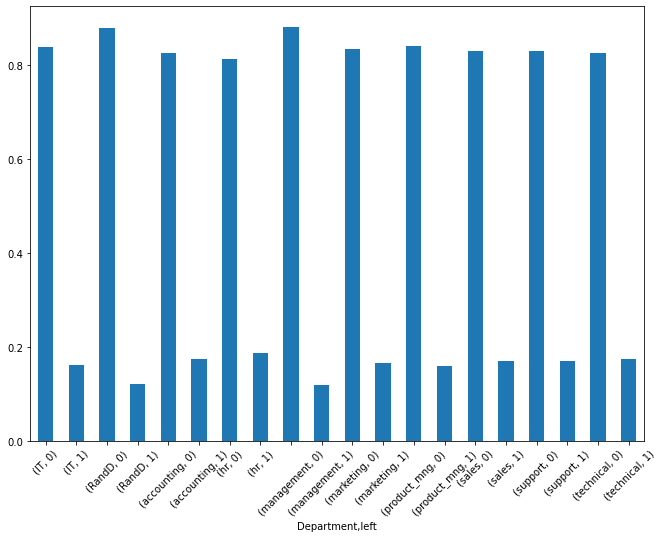

In [37]:
plt.figure(figsize=(11,8))

exit_by_dept = data_deduplicate.groupby("Department")['left'].value_counts(normalize=True)
exit_by_dept.plot(kind='bar')

plt.xticks(rotation='45');

The percentage of employee departure is fairly consistent across different departments, with R&D and management having the highest retention rates and HR having the lowest.

most of the employees that leave come from "sales", "technical", "support" which account for 27.62%, 19.58%, and 15.67% of the workers that left respectively

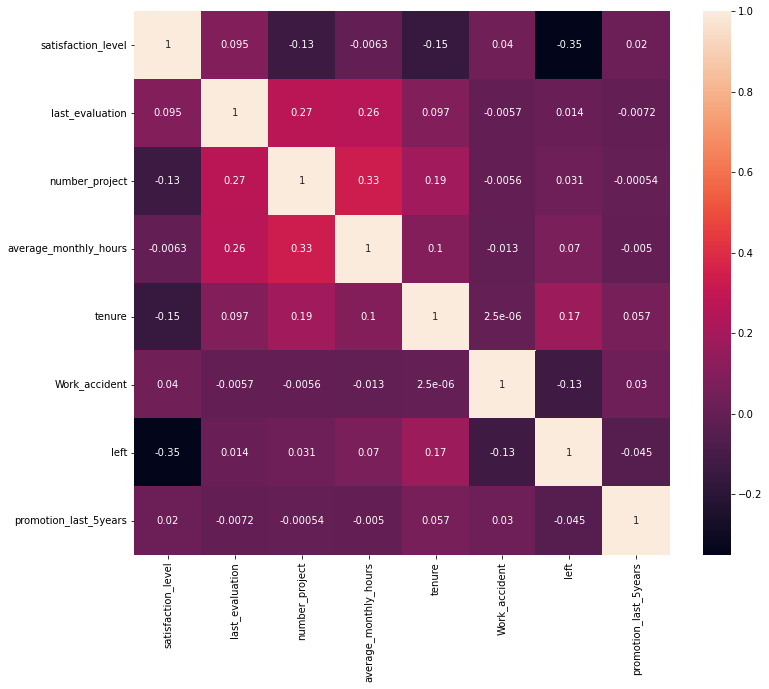

In [38]:
# Create a plot as needed
### YOUR CODE HERE ###

fig, ax = plt.subplots(figsize=(12,10))

sns.heatmap(data_deduplicate.corr(), annot = True)

We can observe from the correlation matrix that the satisfaction level is negatively correlated to an employees retention status. In order words, the lower an employees satisfaction level, the higher their probability of exiting the company

In [39]:
# Create a plot as needed
### YOUR CODE HERE ###


### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This is binary classification model

### Identify the types of models most appropriate for this task.

1. logistic regression model.
2. DecisionTree
3. RandomForest 
4. XGBoost 

### Modeling

Add as many cells as you need to conduct the modeling process.

In [40]:
### YOUR CODE HERE ###

y = data_deduplicate['left']
X = data_deduplicate.drop(labels='left', axis=1)

In [41]:
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  Work_accident  promotion_last_5years Department  salary  
0       3              0                      0      sales     low  
1       6              0                      0      sales  medium  
2       4              0                      0      sales  medium  
3       5              0                      0      sales     low  
4       3              0                      0      sales     low

In [42]:
X_en = pd.get_dummies(X, columns=['Department', 'salary'], drop_first=True )

In [43]:
X_en

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   
11999                0.50             0.73               4   

       average_monthly_hours  tenure  Work_accident  promotion_last_5years  \
0                        157       3              0                      0   
1                        262       6              0                      0   
2                        272       4              0                      0   
3                        223       5              0                      0   
4                        159       3              0                      0   
...                      ...     ...            ...                    ...   
11995                    259      10              1                      1   
11996                    266      10              0                      1   
11997                    185      10              0                      1   
11998                    172      10              0                      1   
11999                    180       3              0                      0   

       Department_RandD  Department_accounting  Department_hr  \
0                     0                      0              0   
1                     0                      0              0   
2                     0                      0              0   
3                     0                      0              0   
4                     0                      0              0   
...                 ...                    ...            ...   
11995                 0                      0              0   
11996                 0                      0              0   
11997                 0                      0              0   
11998                 0                      0              0   
11999                 0                      0              0   

       Department_management  Department_marketing  Department_product_mng  \
0                          0                     0                       0   
1                          0                     0                       0   
2                          0                     0                       0   
3                          0                     0                       0   
4                          0                     0                       0   
...                      ...                   ...                     ...   
11995                      1                     0                       0   
11996                      1                     0                       0   
11997                      1                     0                       0   
11998                      0                     1                       0   
11999                      0                     0                       0   

       Department_sales  Department_support  Department_technical  salary_low  \
0                     1                   0                     0           1   
1                     1                   0                     0           0   
2                     1                   0                     0           0   
3                     1                   0                     0           1   
4                     1                   0                     0           1   
...                 ...                 ...                   ...         ...   
11995                 0                 

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_en, y, test_size=0.25, random_state=42, stratify=y)

In [45]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8993, 18)
(2998, 18)
(8993,)
(2998,)


In [46]:
cv_params = {'n_estimators': [50,75,100],
             'max_depth': [50,75],
             'min_samples_leaf': [0.75,0.1,1.5],
             'min_samples_split': [0.001,0.005],
             'max_features': ['auto','sqrt'],
             'max_samples': [.7,0.8,.9]}

scoring = {'accuracy', 'precision', 'recall','f1'}

In [47]:
rf = RandomForestClassifier(random_state=0)

In [48]:
rf_val = GridSearchCV(rf, cv_params, scoring=scoring, refit='f1', n_jobs = -1, verbose = 1)

In [49]:
rf_val.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   40.0s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=No...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [50]:
rf_val.best_params_

{'max_depth': 50,
 'max_features': 'auto',
 'max_samples': 0.7,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.001,
 'n_estimators': 50}

In [51]:
rf_opt = RandomForestClassifier(n_estimators=50, max_depth=50, 
                               min_samples_leaf=0.1, min_samples_split=0.001,
                               max_features='auto', max_samples=0.7, random_state=0)

In [52]:
rf_opt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=0.7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.001,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [53]:
y_pred = rf_opt.predict(X_test)

In [54]:
pc_test = precision_score(y_test, y_pred)
print("The precision score is {pc:.3f}".format(pc = pc_test))
ac_test = accuracy_score(y_test, y_pred)
print("The accuracy score is {ac:.3f}".format(ac = ac_test))
rc_test = recall_score(y_test, y_pred)
print("The recall score is {rc:.3f}".format(rc = rc_test))

The precision score is 0.000
The accuracy score is 0.834
The recall score is 0.000


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2500
           1       0.00      0.00      0.00       498

    accuracy                           0.83      2998
   macro avg       0.42      0.50      0.45      2998
weighted avg       0.70      0.83      0.76      2998



In [56]:
rf_opt.classes_

array([0, 1])

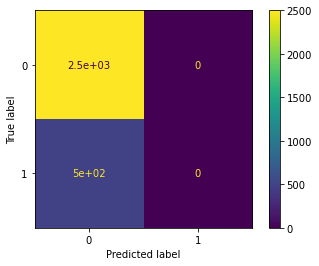

In [57]:
cm = confusion_matrix(y_test, y_pred, labels=rf_opt.classes_)

disp = ConfusionMatrixDisplay(cm, display_labels=rf_opt.classes_)
disp.plot()

the model has predicted 0 for all outcomes because of the imbalance in our dataset, so we would have to upsample the minority classes to improve our model

#### Balancing the dataset by Oversampling the minority class

In [58]:
data_sample = pd.concat([X_train, y_train], axis=1)
data_sample.head()

satisfaction_level  last_evaluation  number_project  \
984                 0.75             0.86               5   
610                 0.09             0.95               7   
7033                0.68             0.61               3   
6411                0.59             0.75               4   
8388                0.59             0.79               3   

      average_monthly_hours  tenure  Work_accident  promotion_last_5years  \
984                     260       5              0                      0   
610                     256       4              0                      0   
7033                    134       4              0                      0   
6411                    190       2              0                      0   
8388                    217       4              0                      0   

      Department_RandD  Department_accounting  Department_hr  \
984                  0                      0              0   
610                  0                      0              0   
7033                 0                      0              0   
6411                 0                      0              0   
8388                 0                      0              0   

      Department_management  Department_marketing  Department_product_mng  \
984                       0                     0                       0   
610                       0                     1                       0   
7033                      0                     0                       0   
6411                      0                     0                       0   
8388                      0                     0                       1   

      Department_sales  Department_support  Department_technical  salary_low  \
984                  0                   0                     0           1   
610                  0                   0                     0           0   
7033                 1                   0                     0           0   
6411                 1                   0                     0           0   
8388                 0                   0                     0           0   

      salary_medium  left  
984               0     1  
610               1     1  
7033              1     0  
6411              1     0  
8388              1     0

In [59]:
data_sample.shape

(8993, 19)

In [60]:
data_sample_0 = data_sample[data_sample['left'] == 0]
data_sample_1 = data_sample[data_sample['left'] == 1]
print(len(data_sample_0))
print(len(data_sample_1))

7500
1493


In [61]:
data_1_upsampled = resample(data_sample_1, n_samples=2500, random_state=42)

In [62]:
upsampled_data = pd.concat([data_sample, data_1_upsampled], axis=0).reset_index(drop=True)

In [63]:
X_train_upsampled = upsampled_data.drop(labels='left', axis=1)
y_train_upsampled = upsampled_data['left']

In [64]:
rf_2 = GridSearchCV(rf, cv_params,scoring=scoring, refit='f1', n_jobs = -1, verbose = 1)

In [65]:
rf_2.fit(X_train_upsampled, y_train_upsampled)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   44.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=No...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [66]:
rf_2.best_params_

{'max_depth': 50,
 'max_features': 'auto',
 'max_samples': 0.8,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.001,
 'n_estimators': 100}

In [67]:

rf_opt_up = RandomForestClassifier(n_estimators=50, max_depth=50, 
                               min_samples_leaf=0.1, min_samples_split=0.001,
                               max_features='auto', max_samples=0.8, random_state=0)



In [68]:
rf_opt_up.fit(X_train_upsampled, y_train_upsampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=0.8,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.001,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [69]:
y_pred=rf_opt_up.predict(X_test)

In [70]:
pc_test = precision_score(y_test, y_pred)
print("The precision score is {pc:.3f}".format(pc = pc_test))
ac_test = accuracy_score(y_test, y_pred)
print("The accuracy score is {ac:.3f}".format(ac = ac_test))
rc_test = recall_score(y_test, y_pred)
print("The recall score is {rc:.3f}".format(rc = rc_test))
f1_test = f1_score(y_test, y_pred)
print("The f1 score is {f1:.3f}".format(f1 = f1_test))

The precision score is 0.845
The accuracy score is 0.926
The recall score is 0.681
The f1 score is 0.754


After upsampling the minority data, we observe a drastic increase in the recall. The model accuracy and precision have also improved

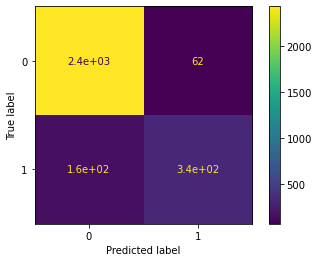

In [71]:
cm = confusion_matrix(y_test, y_pred, labels=rf_opt_up.classes_)

disp = ConfusionMatrixDisplay(cm, display_labels=rf_opt_up.classes_)
disp.plot()

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      2500
           1       0.85      0.68      0.75       498

    accuracy                           0.93      2998
   macro avg       0.89      0.83      0.86      2998
weighted avg       0.92      0.93      0.92      2998



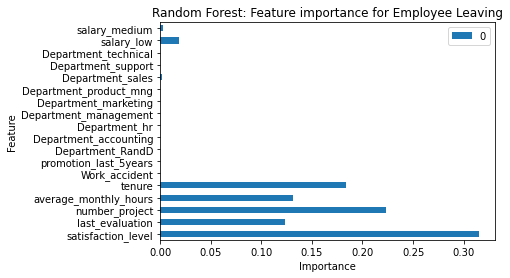

In [73]:
fr_importance = pd.DataFrame(rf_opt_up.feature_importances_,index=X_test.columns )
fig, ax = plt.subplots()
fr_importance.plot(kind='barh', ax=ax)

ax.set_title("Random Forest: Feature importance for Employee Leaving")
ax.set_ylabel("Feature")
ax.set_xlabel("Importance")


plt.show()

#### Training with validation data set

In [74]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train_upsampled, y_train_upsampled, test_size=0.25, random_state=0, stratify=y_train_upsampled)

In [75]:
from sklearn.model_selection import PredefinedSplit
split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [76]:
custom_split

PredefinedSplit(test_fold=array([ 0, -1, ..., -1, -1]))

In [77]:
cv_params = {'n_estimators': [10,20,35],
             'max_depth': [15,25, 35],
             'min_samples_leaf': [0.5,0.1,1.5],
             'min_samples_split': [0.001,0.005],
             'max_features': ['auto','sqrt'],
             'max_samples': [0.2, 0.5,.7,]}

In [78]:
rf2 = RandomForestClassifier()
rf_valid = GridSearchCV(rf2, cv_params, scoring=scoring, cv=custom_split, refit='f1', n_jobs= -1, verbose=1)

In [79]:
rf_valid.fit(X_train_upsampled, y_train_upsampled)

Fitting 1 folds for each of 324 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:    5.3s finished


GridSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ..., -1, -1])),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weigh...
                                              warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_dept

In [80]:
rf_valid.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'max_samples': 0.2,
 'min_samples_leaf': 0.5,
 'min_samples_split': 0.001,
 'n_estimators': 10}

In [81]:
rf_opt_val = RandomForestClassifier(n_estimators=10, max_depth=15, 
                               min_samples_leaf=0.5, min_samples_split=0.001,
                               max_features='auto', max_samples=0.2, random_state=0)

In [82]:
rf_opt_val.fit(X_train_upsampled, y_train_upsampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=0.2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.5, min_samples_split=0.001,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [83]:
y_pred=rf_opt_val.predict(X_test)

In [84]:
pc_test = precision_score(y_test, y_pred)
print("The precision score is {pc:.3f}".format(pc = pc_test))
ac_test = accuracy_score(y_test, y_pred)
print("The accuracy score is {ac:.3f}".format(ac = ac_test))
rc_test = recall_score(y_test, y_pred)
print("The recall score is {rc:.3f}".format(rc = rc_test))
f1_test = f1_score(y_test, y_pred)
print("The f1 score is {f1:.3f}".format(f1 = f1_test))

The precision score is 0.000
The accuracy score is 0.834
The recall score is 0.000
The f1 score is 0.000


the value are low due to underfit of our model parameters


### Using XGBoost Classifier

In [85]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [86]:
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3,5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300,500]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

In [87]:
%%time
xgb_cv.fit(X_train_upsampled, y_train_upsampled)

CPU times: user 11min 46s, sys: 4.3 s, total: 11min 51s
Wall time: 5min 57s


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=0,
                                     reg_alpha=None, ...),
             iid='deprecated

In [88]:
xgb_cv.best_score_

0.9906383721398401

In [89]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 3,
 'n_estimators': 300}

In [90]:
xgb_opt = XGBClassifier(n_estimators = 300, max_depth=12, min_child_weight=3, learning_rate = 0.1)

In [91]:
xgb_opt.fit(X_train_upsampled, y_train_upsampled)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=12, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [92]:
y_pred = xgb_opt.predict(X_test)

In [93]:
pc_test = precision_score(y_test, y_pred)
print("The precision score is {pc:.3f}".format(pc = pc_test))
ac_test = accuracy_score(y_test, y_pred)
print("The accuracy score is {ac:.3f}".format(ac = ac_test))
rc_test = recall_score(y_test, y_pred)
print("The recall score is {rc:.3f}".format(rc = rc_test))
f1_test = f1_score(y_test, y_pred)
print("The f1 score is {f1:.3f}".format(f1 = f1_test))

The precision score is 0.966
The accuracy score is 0.982
The recall score is 0.924
The f1 score is 0.945


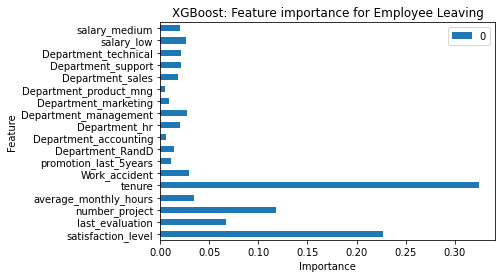

In [94]:
xgb_importance = pd.DataFrame(xgb_opt.feature_importances_,index=X_test.columns )
fig, ax = plt.subplots()
xgb_importance.plot(kind='barh', ax=ax)

ax.set_title("XGBoost: Feature importance for Employee Leaving")
ax.set_ylabel("Feature")
ax.set_xlabel("Importance")

plt.show()

#### Remove outliers and retrain the model

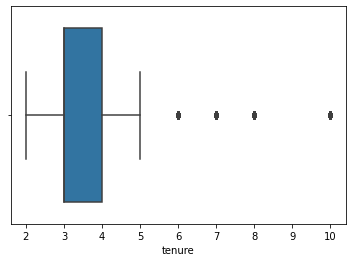

In [95]:
sns.boxplot(data_deduplicate['tenure'])

In [96]:
#computing the 25th percentile of 'tenure'
percentile25 = data_deduplicate['tenure'].quantile(0.25)

#computing the 75th percentile of 'tenure'
percentile75 = data_deduplicate['tenure'].quantile(0.75)

#compute the interquartile range in "tenure"
iqr = percentile75 - percentile25

#define the upper limit and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Lower limit: ', lower_limit)
print('Upper limit: ', upper_limit)

outliers = data_deduplicate[(data_deduplicate['tenure'] > upper_limit) | (data_deduplicate['tenure'] < lower_limit)]

print(len(outliers))

Lower limit:  1.5
Upper limit:  5.5
824


In [97]:
#data_no_outl = data_deduplicate.drop(labels = outliers.index, axis=0)

In [98]:
data_no_outl = data_deduplicate[(data_deduplicate['tenure'] >= lower_limit) & (data_deduplicate['tenure'] <= upper_limit)]

In [99]:
len(data_no_outl)

11167

In [100]:
len(data_no_outl) + (len(outliers)) == len(data_deduplicate)

True

In [101]:
data_no_outl.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  Work_accident  left  promotion_last_5years Department  salary  
0       3              0     1                      0      sales     low  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low  
5       3              0     1                      0      sales     low

In [102]:
y_no_outl = data_no_outl['left']
X_no_outl = data_no_outl.drop(labels='left', axis=1)

In [103]:
X_encoded = pd.get_dummies(X_no_outl, columns=['Department','salary'], drop_first = True)

In [104]:
X_encoded.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  Work_accident  promotion_last_5years  Department_RandD  \
0       3              0                      0                 0   
2       4              0                      0                 0   
3       5              0                      0                 0   
4       3              0                      0                 0   
5       3              0                      0                 0   

   Department_accounting  Department_hr  Department_management  \
0                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   
5                      0              0                      0   

   Department_marketing  Department_product_mng  Department_sales  \
0                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   
5                     0                       0                 1   

   Department_support  Department_technical  salary_low  salary_medium  
0                   0                     0           1              0  
2                   0                     0           0              1  
3                   0                     0           1              0  
4                   0                     0           1              0  
5                   0                     0           1              0

In [105]:
X_train, X_test, y_train, y_test =  train_test_split(X_encoded, y_no_outl, test_size=0.25, random_state=42, stratify=y_no_outl)

In [106]:
log_clf = LogisticRegression(random_state=42, max_iter=500)
log_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
y_pred = log_clf.predict(X_test)

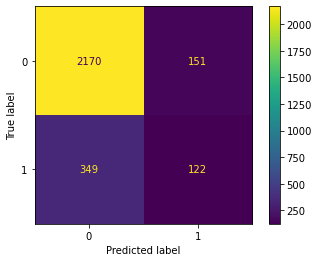

In [108]:
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

log_disp.plot(values_format='')

plt.show()

In [109]:
target_names = ['Predicted would not leave', 'Predicted would leave']

print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.45      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



In [110]:
scaler = StandardScaler()



In [111]:
X_scaled = scaler.fit_transform(X_encoded)

X_train_s, X_test_s, y_train_s, y_test_s =  train_test_split(X_scaled, y_no_outl, test_size=0.25, random_state=42, stratify=y_no_outl)

In [112]:
log_clf = LogisticRegression(random_state=42, max_iter=500)
log_clf.fit(X_train_s, y_train_s)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
y_pred_s = log_clf.predict(X_test_s)

In [114]:
target_names = ['Predicted would not leave', 'Predicted would leave']

print(classification_report(y_test_s, y_pred_s, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.45      0.27      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.66      0.60      0.62      2792
             weighted avg       0.79      0.82      0.80      2792



There isn't much difference in the model performance between the model trained with scaled data and that trained with unscaled data

### Modeling Approach B: Tree - based Model using dataset without outlier

In [115]:
train_data = pd.concat([X_train,y_train], axis=1).reset_index(drop=True)
train_data['left'].value_counts()

0    6964
1    1411
Name: left, dtype: int64

In [116]:
#we will upsample the minority class and normalize with min-max scaler

train_data_0 = train_data[train_data['left'] == 0]
train_data_1 = train_data[train_data['left'] == 1]
train_data_sample = resample(train_data_1, n_samples = 3500, replace=True, random_state = 42)

#adding our resampled data to the dataframe
training_data = pd.concat([train_data, train_data_sample], axis=0)
training_data.shape

(11875, 19)

In [117]:
columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'Work_accident',
       'promotion_last_5years', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium']

In [118]:
#normalizing our data with minmax
from sklearn.preprocessing import MinMaxScaler
X_training = training_data.drop('left', axis=1)
y_training = training_data['left']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_training)
X_scaled = pd.DataFrame(X_scaled, columns = columns)

In [119]:
cv_params = {'n_estimators': [10, 35, 50],
             'max_depth': [15,25, 50],
             'min_samples_leaf': [0.5,0.1,1.5],
             'min_samples_split': [0.001,0.005],
             'max_features': ['auto','sqrt'],
             'max_samples': [0.2, 0.5,.7,]}

rf2 = RandomForestClassifier()
rf_scaled = GridSearchCV(rf2, cv_params, scoring=scoring, refit='f1', n_jobs= -1, verbose=1)

In [120]:
y_training.value_counts()

0    6964
1    4911
Name: left, dtype: int64

In [121]:
rf_scaled.fit(X_scaled, y_training)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 722 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:   41.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=No...
                                              warm_start=False),
             iid='deprecated', n_jobs=-1,
    

In [122]:
rf_scaled.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'max_samples': 0.7,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.005,
 'n_estimators': 10}

In [123]:
y_pred = rf_scaled.best_estimator_.predict(X_test)

In [124]:
pc_test = precision_score(y_test, y_pred)
print("The precision score is {pc:.3f}".format(pc = pc_test))
ac_test = accuracy_score(y_test, y_pred)
print("The accuracy score is {ac:.3f}".format(ac = ac_test))
rc_test = recall_score(y_test, y_pred)
print("The recall score is {rc:.3f}".format(rc = rc_test))
f1_test = f1_score(y_test, y_pred)
print("The f1 score is {f1:.3f}".format(f1 = f1_test))

The precision score is 0.312
The accuracy score is 0.687
The recall score is 0.711
The f1 score is 0.434


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.